In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = pd.read_csv('insurance.csv')


In [4]:
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [5]:
X = data.drop(columns=['charges'])  # Các đặc trưng (features)
y = data['charges']  # Biến mục tiêu (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
#Tạo mô hình hồi quy tuyến tính và huấn luyện trên dữ liệu đã chuẩn hóa
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}\n")


Linear Regression Results:
Mean Squared Error (MSE): 33635210.43
R² Score: 0.78



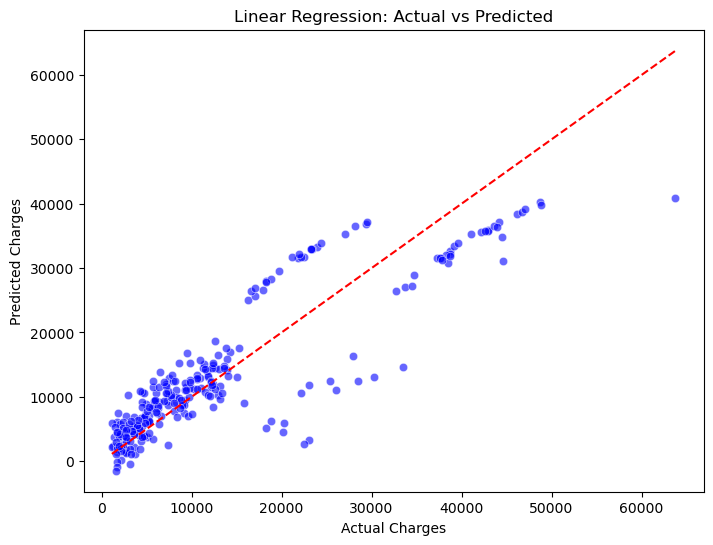

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Đường tham chiếu
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()


In [8]:
#Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)
#Tạo mô hình cây quyết định và huấn luyện trên dữ liệu.
y_pred_tree = tree_model.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Results:")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"R² Score: {r2_tree:.2f}\n")



Decision Tree Regression Results:
Mean Squared Error (MSE): 47349691.41
R² Score: 0.70



In [9]:
#Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)
y_pred_forest = forest_model.predict(X_test_scaled)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_forest:.2f}")
print(f"R² Score: {r2_forest:.2f}\n")



Random Forest Regression Results:
Mean Squared Error (MSE): 20898625.74
R² Score: 0.87



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assume 'data' is your DataFrame, and 'target' is your target column
X = data.drop('target', axis=1)  # Features (all columns except 'target')
y = data['target']  # Target variable (the 'target' column)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Prediction using the test set
y_pred = lin_reg.predict(X_test)

# Calculate metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Print the metrics
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)


NameError: name 'X' is not defined

### Heatmap of errors


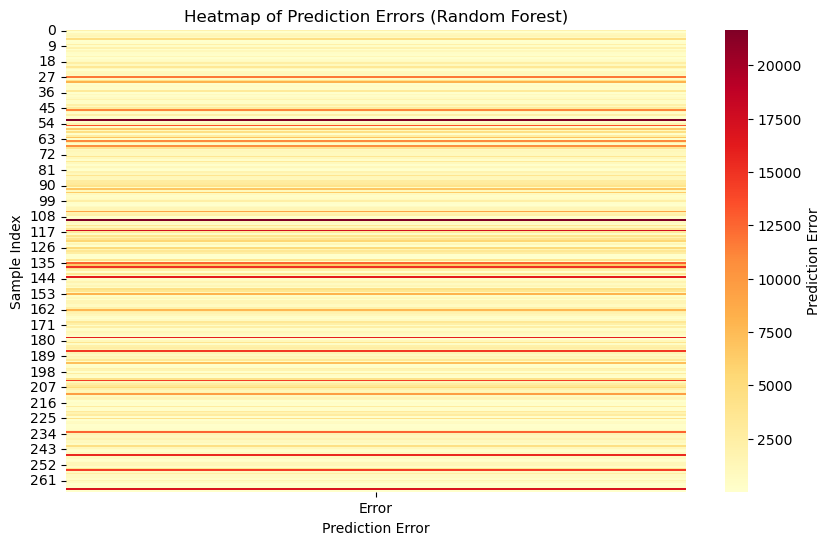

In [13]:


# Tạo một DataFrame chứa giá trị thực tế, dự đoán và sai số
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_forest,
    "Error": np.abs(y_test.values - y_pred_forest)
})

# Vẽ heatmap của sai số
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df[["Error"]], cmap="YlOrRd", cbar_kws={'label': 'Prediction Error'}, annot=False)
plt.title("Heatmap of Prediction Errors (Random Forest)")
plt.xlabel("Prediction Error")
plt.ylabel("Sample Index")
plt.show()


In [12]:
feature_importances = pd.Series(forest_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


smoker      0.608618
bmi         0.216291
age         0.134554
children    0.020199
region      0.013926
sex         0.006412
dtype: float64


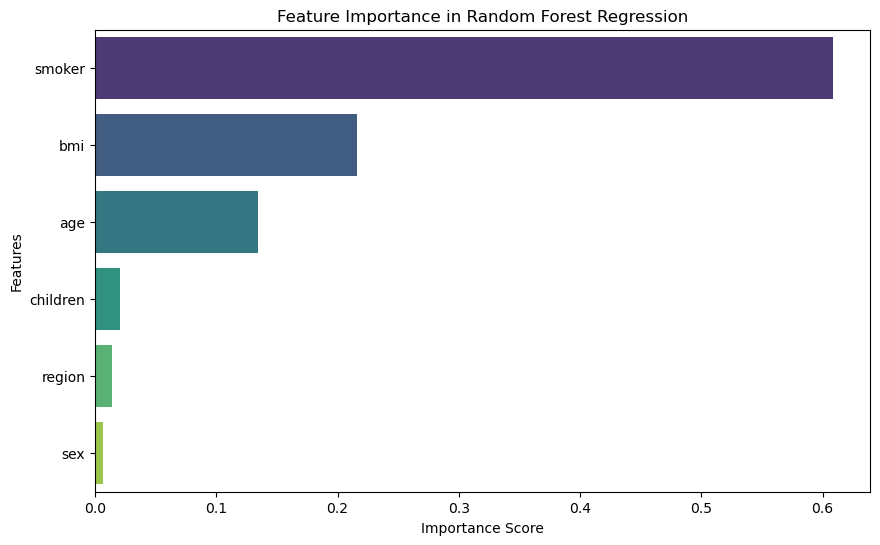

In [14]:
# Lấy tầm quan trọng của các đặc trưng
importances = forest_model.feature_importances_
feature_names = X.columns

# Tạo DataFrame để hiển thị
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest Regression")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()